data는 이걸 씁니다 > https://www.kaggle.com/datasets/vipullrathod/fish-market

In [1]:
from sklearn.neighbors import KNeighborsClassifier

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [5]:
import pandas as pd

df = pd.read_csv('Fish.csv')

In [6]:
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


length 1,2,3는 각각 첫번째 두번째 세번째로 길이 측정 => 평균을 내면 계산이 쉬워질듯?

In [10]:
df['Length'] = df.loc[: , 'Length1':'Length3'].mean(axis=1)
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width,Length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274,30.400000
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785,30.333333
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900,30.866667
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438,30.900000
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594,31.800000


In [11]:
df2 = df[['Species', 'Weight', 'Length', 'Height', 'Width']]
df2.head(10)

,Species,Weight,Length,Height,Width
0,Bream,242.0,26.200000,11.5200,4.0200
1,Bream,290.0,27.166667,12.4800,4.3056
2,Bream,340.0,27.166667,12.3778,4.6961
3,Bream,363.0,29.600000,12.7300,4.4555
4,Bream,430.0,29.833333,12.4440,5.1340
5,Bream,450.0,30.400000,13.6024,4.9274
6,Bream,500.0,30.333333,14.1795,5.2785
7,Bream,390.0,30.866667,12.6700,4.6900
8,Bream,450.0,30.900000,14.0049,4.8438
9,Bream,500.0,31.800000,14.2266,4.9594


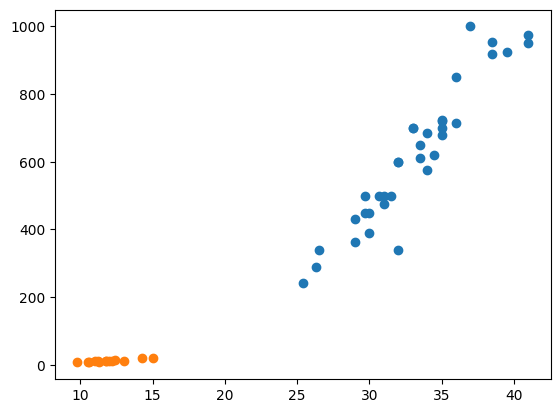

In [7]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.show()

In [15]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
print(len(smelt_length))
print(len(bream_weight))

14
35


In [13]:
fish_data = []

for l, w in zip(length, weight):
    fish_data.append([l, w])

In [27]:
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [16]:
fish_target = [1] * 35 + [0] * 14

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

fish_data = []
for l, w in zip(length, weight):
    fish_data.append([l, w])

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [19]:
r = kn.predict([[30.1, 600.123]])

if kn.predict([[30, 600]])[0] == 1:
    print("도미")
else:
    print("빙어")

도미


In [24]:
#모듈 저장하기
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)

In [25]:
#모듈 불러오기
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)

fish_model.predict([[30.1, 600.123]])

array([1])